<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%EA%B3%A0%EC%A0%84%EC%97%AD%ED%95%99_006_Fowles_AM_2_5_(solve_ivp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 고전역학

# Fowles AM 2.5 유체 속의 수직 낙하: 수치적 해법

**`scipy.integrate.solve_ivp`**를 사용하는 예

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
"""
해석적인 방법으로 구한 정확한 공식
T: 시간축 (t/tau)
ulin: 선형 저항을 받는 경우의 속도(v/vt)
uquad: 제곱형 저항을 받는 경우의 속도 (v/vt)
"""
T = np.linspace(0,4.0,101)
ulin = 1 - np.exp(-T)
uquad = np.tanh(T)

In [ ]:
len(ulin)

101

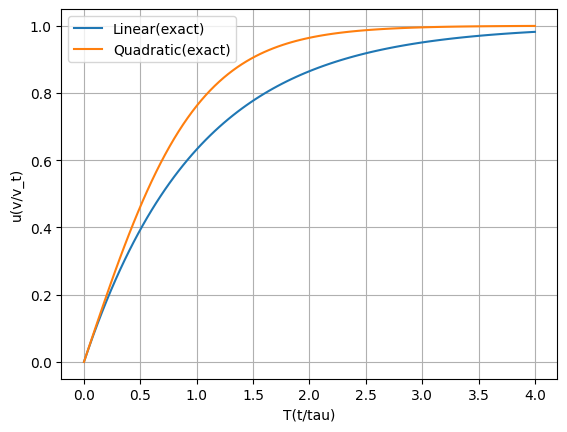

In [ ]:
"""
정규화한 속도-시간 그래프를 그려 비교한다.
(vt 값이 선형 저항의 경우와 제곱형 저항의의 경우가 같지 않음에 유의)
"""
plt.plot(T, ulin, label="Linear(exact)")
plt.plot(T, uquad, label="Quadratic(exact)")
plt.xlabel("T(t/tau)")
plt.ylabel("u(v/v_t)")
plt.grid()
plt.legend()

In [ ]:
"""
수치 시뮬레이션을 위해
선형 및 제곱형 저항력의 경우 각각에 대하여
주어진 속도 값에 따라 가속도 값을 반환하는 함수들을 정의한다.
"""

'''
Linear Resistsance
'''
def linear(t, y):
  X, u = y
  dudt = 1-u

  return(np.array([u, dudt]))
'''
Quadratic Resistance
'''
def quadratic(t, y):
  X, u = y
  dudt = 1-u*u

  return(np.array([u, dudt]))

In [ ]:
"""
시작 시간(t0), 초기 속도(u0), 시뮬레이션 종료 시각(tb), 시뮬레이션 시간 간격(dt) 등
초기값을 정한다.
"""
t0 = 0   # starting time = 0
x0 = 0   #  initial position = 0
u0 = 0   # initial velocity = 0: free fall
tf = 4.0           # simulation time limit
N = 100  # division number
dt = (tf - t0) / N  # time step
teval = np.linspace(t0, tf, N+1)

"""
선형 저항:
"""
linsol = solve_ivp(linear, (t0, tf), [x0, u0], t_eval=teval, max_step=dt)

"""
제곱형 저항:
"""
quadsol = solve_ivp(quadratic, (t0, tf), [x0, u0], t_eval=teval, max_step=dt)


In [ ]:
len(linsol.t)

101

In [ ]:
tl=linsol.t
xl=linsol.y[0]
ul=linsol.y[1]

tq=quadsol.t
xq=quadsol.y[0]
uq=quadsol.y[1]

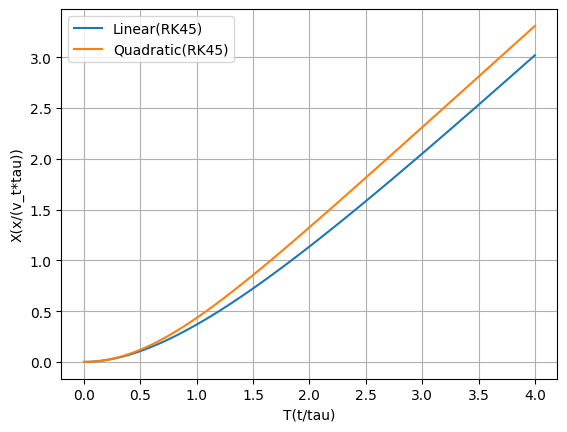

In [ ]:
"""
시뮬레이션 결과를 그래프로 그려 본다.
위치-시간 그래프:
"""
plt.plot(tl, xl, label="Linear(RK45)")
plt.plot(tq, xq, label="Quadratic(RK45)")
plt.grid()
plt.xlabel("T(t/tau)")
plt.ylabel("X(x/(v_t*tau))")
plt.legend()

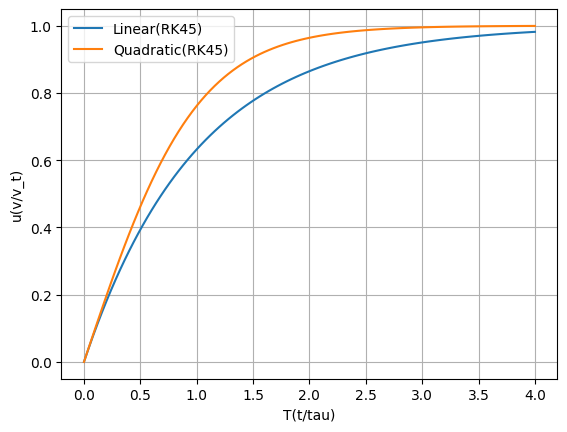

In [ ]:
"""
시뮬레이션 결과를 그래프로 그려 본다.
정규화된 속도-시간 그래프:
"""
plt.plot(tl, ul, label="Linear(RK45)")
plt.plot(tq, uq, label="Quadratic(RK45)")
plt.grid()
plt.xlabel("T(t/tau)")
plt.ylabel("u(v/v_t)")
plt.legend()

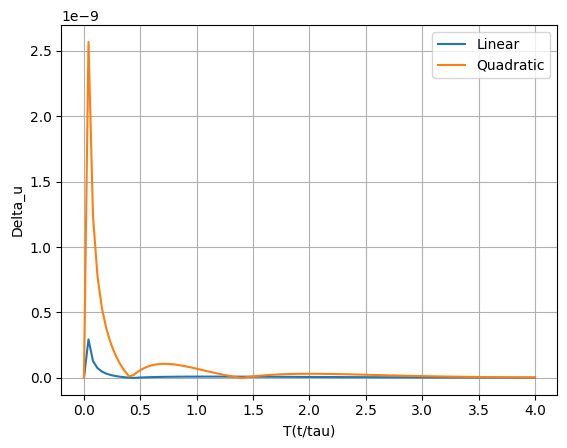

In [ ]:
"""
정확한 계산값에 대한 시뮬레이션 결과의 상대 오차를
선형 저항과 제곱형 저항에 대하여 각각 계산하여 그래프로 그려본다.
"""
DeltaL = np.abs(ul - ulin)
DeltaL[ulin>0] /= ulin[ulin>0] # ulin 값이 0이 아닌 원소에 대하여 상대 오차를 구한다.

DeltaQ = np.abs(uq - uquad)
DeltaQ[uquad>0] /= uquad[uquad>0] # uquad 값이 0이 아닌 원소에 대하여 상대 오차를 구한다.

plt.plot(tl, DeltaL)
plt.plot(tq, DeltaQ)
plt.grid()
plt.xlabel("T(t/tau)")
plt.ylabel("Delta_u")
plt.legend(["Linear", "Quadratic"])
plt.show()